In [1]:
import torch
from torch import nn

In [2]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_features=2, 
                                out_features=1)

    def forward(self, x):
        x = self.linear(x)
        return torch.sigmoid(x)

In [3]:
class SoftmaxRegression(nn.Module):
    def __init__(self):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(in_features=2, 
                                out_features=2)

    def forward(self, x):
        x = self.linear(x)
        return nn.functional.log_softmax(x, dim=1)

In [4]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.hidden = nn.Linear(in_features=2, 
                                out_features=3)
        self.out = nn.Linear(in_features=3, 
                                out_features=2)

    def forward(self, x):
        x = self.hidden(x)
        x = torch.sigmoid(x)
        x = self.out(x)
        return nn.functional.log_softmax(x, dim=1)

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np

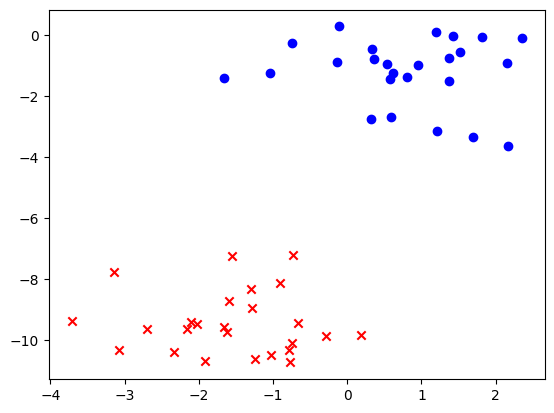

In [6]:
x, y = make_blobs(n_samples=50, centers=2, random_state=2, cluster_std=1)

x1 = x[:, 0]
x2 = x[:, 1]

plt.scatter(x1[y==1], x2[y==1], color='blue', marker='o')
plt.scatter(x1[y==0], x2[y==0], color='red', marker='x')

In [7]:
# softmax回归
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

model = SoftmaxRegression()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.NLLLoss()

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item():.3f}')



Epoch: 0, Loss: 0.679
Epoch: 1000, Loss: 0.083
Epoch: 2000, Loss: 0.047
Epoch: 3000, Loss: 0.029
Epoch: 4000, Loss: 0.018
Epoch: 5000, Loss: 0.011
Epoch: 6000, Loss: 0.007
Epoch: 7000, Loss: 0.005
Epoch: 8000, Loss: 0.003
Epoch: 9000, Loss: 0.002


In [8]:
# 神经网络
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

model = Network()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.NLLLoss()

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item():.3f}')

Epoch: 0, Loss: 0.829
Epoch: 1000, Loss: 0.182
Epoch: 2000, Loss: 0.063
Epoch: 3000, Loss: 0.026
Epoch: 4000, Loss: 0.012
Epoch: 5000, Loss: 0.006
Epoch: 6000, Loss: 0.003
Epoch: 7000, Loss: 0.002
Epoch: 8000, Loss: 0.001
Epoch: 9000, Loss: 0.001


In [9]:
# 逻辑回归

# softmax回归
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

model = LogisticRegression()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCELoss()

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item():.3f}')

Epoch: 0, Loss: 0.920
Epoch: 1000, Loss: 0.319
Epoch: 2000, Loss: 0.164
Epoch: 3000, Loss: 0.104
Epoch: 4000, Loss: 0.072
Epoch: 5000, Loss: 0.050
Epoch: 6000, Loss: 0.035
Epoch: 7000, Loss: 0.025
Epoch: 8000, Loss: 0.018
Epoch: 9000, Loss: 0.013
